<a href="https://colab.research.google.com/github/KhotNoorin/Algorithm-practice/blob/main/Optimizers_Comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Noorin Nasir Khot

ID Number: 2024KPAD1007

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Normalize data (scale pixel values to [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
# Flatten the images (convert 28x28 matrices to 1D arrays of size 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


In [ ]:
# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# Function to train and evaluate model with a specific optimizer
def train_with_optimizer(optimizer_name, optimizer):
    print(f"Training with {optimizer_name} optimizer")
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32, verbose=0)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"Test Accuracy with {optimizer_name}: {test_acc:.4f}\n")

    # Predict labels for confusion matrix
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    return history.history['val_accuracy'], test_acc, y_true, y_pred_classes


In [ ]:
# Choose the optimizers: Adam, SGD, Nadam, Adadelta
selected_optimizers = {
    'Adam': keras.optimizers.Adam(),
    'SGD': keras.optimizers.SGD(),
    'Nadam': keras.optimizers.Nadam(),
    'Adadelta': keras.optimizers.Adadelta()
}

In [ ]:
# Dictionary to store accuracy results
accuracy_results = {}
histories = {}
confusion_matrices = {}

In [ ]:
# Train and evaluate each optimizer
for opt_name, optimizer in selected_optimizers.items():
    val_acc, test_acc, y_true, y_pred_classes = train_with_optimizer(opt_name, optimizer)
    accuracy_results[opt_name] = test_acc
    histories[opt_name] = val_acc
    confusion_matrices[opt_name] = confusion_matrix(y_true, y_pred_classes)

Training with Adam optimizer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 - 1s - 2ms/step - accuracy: 0.9818 - loss: 0.0783
Test Accuracy with Adam: 0.9818

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training with SGD optimizer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 - 1s - 2ms/step - accuracy: 0.9739 - loss: 0.0822
Test Accuracy with SGD: 0.9739

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training with Nadam optimizer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 - 1s - 2ms/step - accuracy: 0.9806 - loss: 0.0904
Test Accuracy with Nadam: 0.9806

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with Adadelta optimizer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 - 1s - 2ms/step - accuracy: 0.7434 - loss: 1.2281
Test Accuracy with Adadelta: 0.7434

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


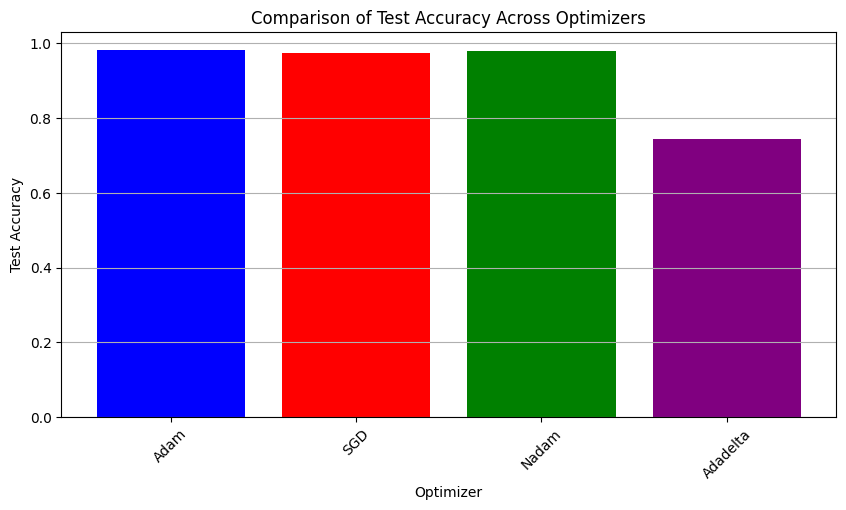

In [ ]:
# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'red', 'green', 'purple'])
plt.xlabel('Optimizer')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy Across Optimizers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

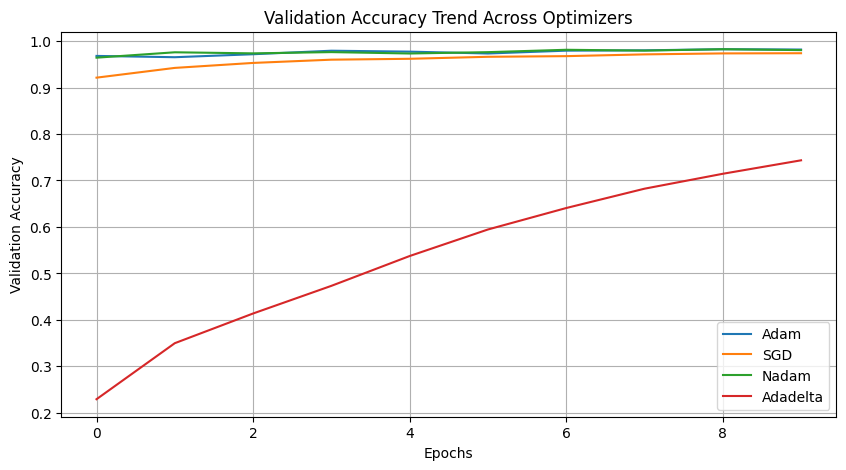

In [ ]:
# Plot validation accuracy trends over epochs
plt.figure(figsize=(10, 5))
for opt_name, val_acc in histories.items():
    plt.plot(val_acc, label=opt_name)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Trend Across Optimizers')
plt.legend()
plt.grid()
plt.show()

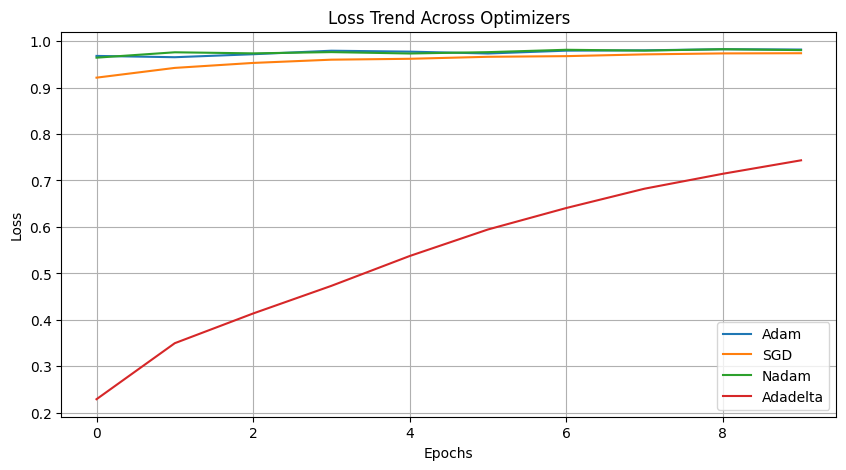

In [ ]:
# Plot loss trends over epochs
plt.figure(figsize=(10, 5))
for opt_name in selected_optimizers.keys():
    plt.plot(histories[opt_name], label=opt_name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend Across Optimizers')
plt.legend()
plt.grid()
plt.show()

<ipython-input-15-62a9cb89df9c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=list(accuracy_results.values()), palette="coolwarm")


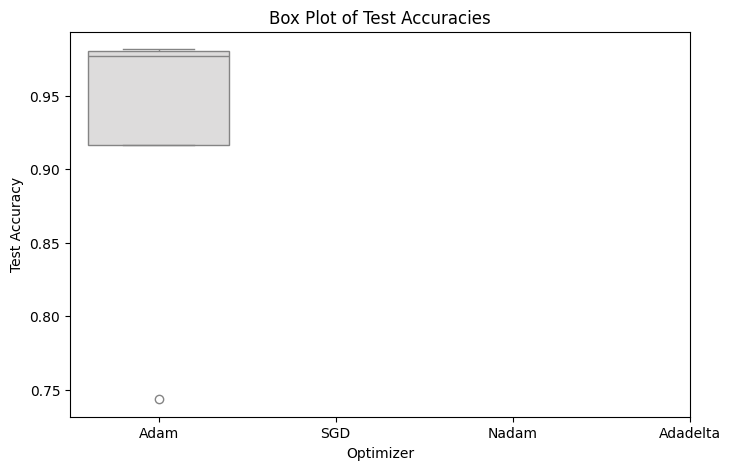

In [ ]:
# Box plot of test accuracies
plt.figure(figsize=(8, 5))
sns.boxplot(data=list(accuracy_results.values()), palette="coolwarm")
plt.xticks(range(len(accuracy_results.keys())), accuracy_results.keys())
plt.xlabel('Optimizer')
plt.ylabel('Test Accuracy')
plt.title('Box Plot of Test Accuracies')
plt.show()

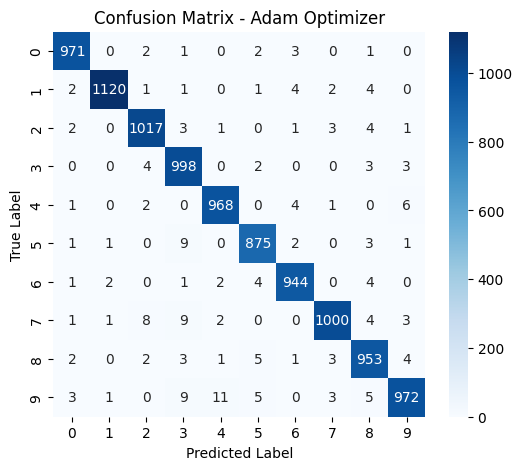

In [ ]:
# Confusion Matrix for Adam
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrices['Adam'], annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Adam Optimizer')
plt.show()

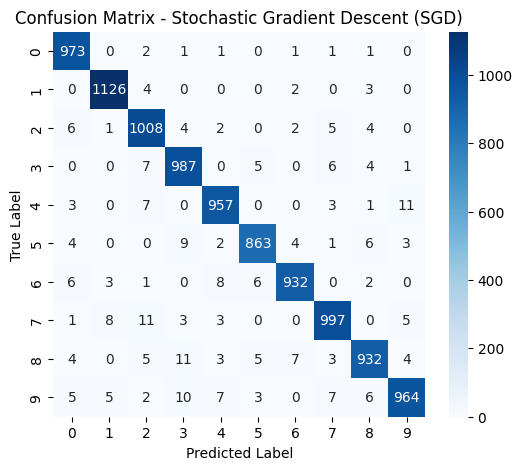

In [ ]:
# Confusion Matrix for SGD
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrices['SGD'], annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Stochastic Gradient Descent (SGD)')
plt.show()

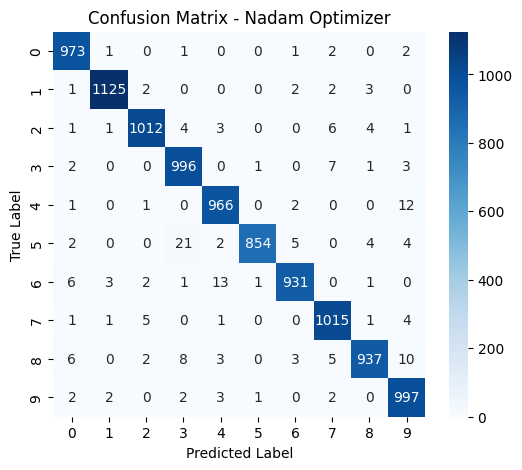

In [ ]:
# Confusion Matrix for Nadam
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrices['Nadam'], annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Nadam Optimizer')
plt.show()

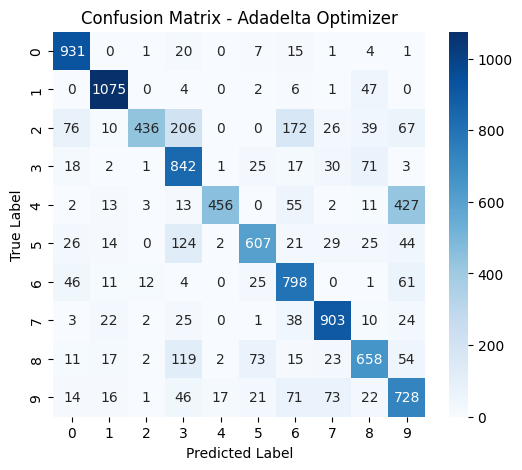

In [ ]:
# Confusion Matrix for Adadelta
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrices['Adadelta'], annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Adadelta Optimizer')
plt.show()

In [ ]:
# Summary of results
for opt, acc in accuracy_results.items():
    print(f"{opt}: {acc:.4f}")

Adam: 0.9818
SGD: 0.9739
Nadam: 0.9806
Adadelta: 0.7434
